In [1]:
import pandas as pd
import numpy as np

## **Carregando os Dados**

In [2]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## **Tipos de Variáveis**

### **Variáveis Qualitativas Ordinais**

> Variáveis que podem ser ordenadas ou hierarquizadas

In [3]:
sorted(dados['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### **Variaveis Qualitativas Nominais**

>Variáveis que não podem ser ordenadas ou hierarquizadas

In [4]:
dados['UF'].unique()

array([11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31,
       32, 33, 35, 41, 42, 43, 50, 51, 52, 53])

In [5]:
dados['Sexo'].unique()

array([0, 1])

In [6]:
sorted(dados['Cor'].unique(),reverse=True)

[8, 6, 4, 2, 0]

### **Variáveis Quantitativas Discretas**
> Representa uma contagem onde os valores possíveis formam um conuunto finito ou enumerável

In [7]:
# Idade
print(f'De {dados["Idade"].min()} até {dados["Idade"].max()} anos')

De 13 até 99 anos


#### <font color= 'red'> Observação </font>
---
> A variável idade pode ser classificada de tres formas distintas: 
> 1. <b>QUATITATIVA DISCRETA</b> - Quando representa anos completos (Não apresenta valores com virgula ou quebrados)
> 2. <b>QUANTITATIVA CONTINUA</b> - Quando representa a idade exata, sendo reprensetada por frações de anos (valor quebrado)
> 3. <b>QUALITATIVA ORDINAL</b> - Quando representa faixas de idade (5 a 10 anos)

### **Variáveis Quantitativas Continuas**

> Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala continua (núemeros reais)

In [8]:
print(f'De {round(dados["Altura"].min(),2)} até metros {round(dados["Altura"].max(),2)}')

De 1.34 até metros 2.03


## **Distribuição de Frequencias**
---
O primeiro passo em um trabalgo de análise é o conhei mento do comportamento das variáveisenvolvidas no estudo. Utilizando técnicas estatisticas como as análises das <b>DISTRIBUIÇÕES DE FREQUENCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os nenomenos em estudo se distribuem.

### **Método 1**

In [9]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [10]:
# Posso fazer conversão do resultado para um DataFrame
round(dados['Sexo'].value_counts(normalize= True, ascending= True) * 100,2).to_frame()

,Sexo
1,30.7
0,69.3


In [11]:
# Aramazenando todos os Dados em um DataFrame para ter uma melhor visualisação do Dados
frequencia = dados['Sexo'].value_counts()
percentual = round(dados['Sexo'].value_counts(normalize= True, ascending= True) * 100,2)

compilado = pd.DataFrame({'Frenquencia': frequencia, 'Percentual': percentual})
compilado

,Frenquencia,Percentual
0,53250,69.3
1,23590,30.7


In [12]:
# Alterando o nome dos indices
compilado.rename(index = {0:'Masculino', 1:'Feminino'}, inplace = True)
compilado

,Frenquencia,Percentual
Masculino,53250,69.3
Feminino,23590,30.7


In [13]:
# Outra coisa legal é que podemo renomear os indices Tambem
compilado.rename_axis('Sexo', axis = 1, inplace = True)
compilado

Sexo,Frenquencia,Percentual
Masculino,53250,69.3
Feminino,23590,30.7


## **Método 2**

In [19]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}

cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}

### CrossTab

In [22]:
# Exibindo a tabela no formato "Cru"
frequencia = pd.crosstab(dados['Sexo'], dados['Cor'])
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [24]:
# Exibindo a tabela no formato "Cru" com percentuais
frequencia = pd.crosstab(dados['Sexo'], dados['Cor'], normalize= True) * 100
round(frequencia,2)

Cor,0,2,4,6,8
Sexo,,,,,
0,0.33,28.88,7.16,0.31,32.62
1,0.13,12.52,3.76,0.15,14.14


In [21]:
# Renomeando Colunas das Tabelas
frequencia.rename(index=sexo, inplace = True)
frequencia.rename(columns= cor, inplace= True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [34]:
# Tambem é possivel utilizar o CrossTab para outros tipos de Análises
# Por exemplo, vamos ver a média de salário da galera
# Exibindo a tabela no formato "Cru"
frequencia = pd.crosstab(dados['Sexo'], dados['Cor'], 
                        aggfunc='max', values = dados['Renda'])
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
0,10000,200000,50000,50000,100000
1,120000,100000,23000,20000,30000


In [35]:
frequencia.rename(index=sexo, inplace = True)
frequencia.rename(columns= cor, inplace= True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


## **Tabela de Frequencias**

#### Regra de Sturges

Regra para definir o numero de classes ideal dentro de um DataFrame

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [37]:
dados.shape

(76840, 7)

In [40]:
# Verificando a quantidade de Classes ideal para meu Data Frame
K = 1 + (10/3) * np.log10(dados.shape[0])
print(round(K))

17


In [54]:
# O método Cut me possibilita a criação de grupos dentro do Data Frame
# Parametro bins informa quantidade de grupos que criarei
pd.value_counts(pd.cut(x= dados['Renda'], bins= 17, include_lowest= True),sort = True)

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(94117.647, 105882.353]         6
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(188235.294, 200000.0]          3
(82352.941, 94117.647]          1
(117647.059, 129411.765]        1
(105882.353, 117647.059]        0
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
Name: Renda, dtype: int64

In [51]:
# pd.value_counts(pd.cut(x= dados['Renda'], bins= 17, include_lowest= True),sort = True)
pd.value_counts(pd.cut(x= dados['Renda'], bins = int(K), include_lowest= True), normalize= True) * 100

(-200.001, 11764.706]       98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(94117.647, 105882.353]      0.007808
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(188235.294, 200000.0]       0.003904
(82352.941, 94117.647]       0.001301
(117647.059, 129411.765]     0.001301
(105882.353, 117647.059]     0.000000
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
Name: Renda, dtype: float64

In [57]:
frequencia = pd.value_counts(pd.cut(x= dados['Renda'], bins= 17, include_lowest= True),sort = True)
percentual = pd.value_counts(pd.cut(x= dados['Renda'], bins= 17, include_lowest= True),sort = True, normalize= True) * 100

In [61]:
consolidado = pd.DataFrame({'Frequencia': frequencia, 'Pecentual': percentual})
consolidado.rename_axis('Faixa Salarial', axis = 1, inplace = True)
round(consolidado)

Faixa Salarial,Frequencia,Pecentual
"(-200.001, 11764.706]",75594,98.0
"(11764.706, 23529.412]",1022,1.0
"(23529.412, 35294.118]",169,0.0
"(35294.118, 47058.824]",19,0.0
"(47058.824, 58823.529]",16,0.0
"(94117.647, 105882.353]",6,0.0
"(58823.529, 70588.235]",5,0.0
"(70588.235, 82352.941]",4,0.0
"(188235.294, 200000.0]",3,0.0
"(82352.941, 94117.647]",1,0.0


## **Histograma**

In [69]:
import seaborn as sns
sns.set()

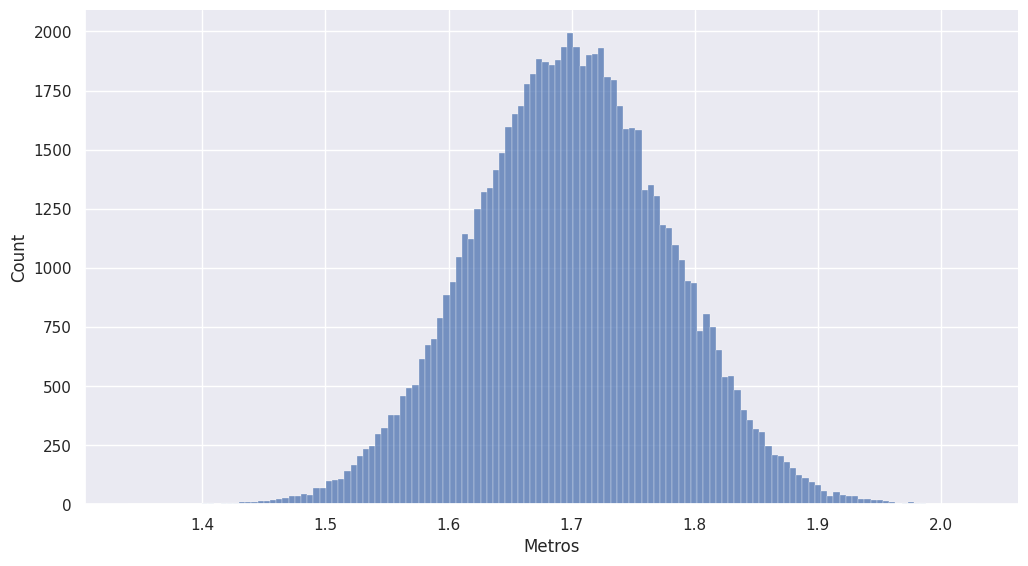

In [78]:
ax = sns.displot(x= dados['Altura'])
ax.figure.set_size_inches(12,6)
ax.set_titles('Distribuição de Frequencia - Altura', fontsize = 16)
ax.set_xlabels('Metros', fontsize = 12);


## **Medidas de Tendência Central**

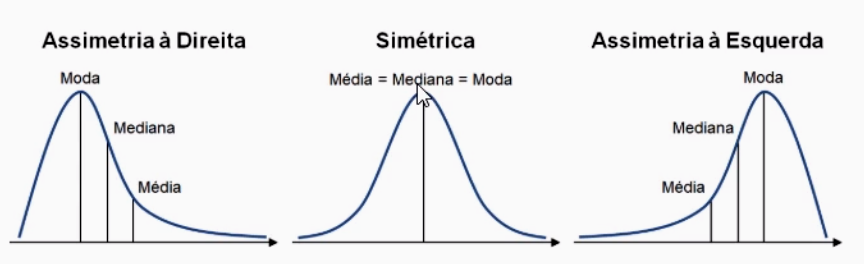

In [80]:
from IPython import display
display.Image('Distribuições.png')

## **Medidas Speratrizes**

### **Quartis**

In [89]:
# Pegando os Quartis da Renda
# Posso pegar de forma separada, ou passar uma lista com o que quero
print(dados['Renda'].quantile([0.25]))
print()
print(dados['Renda'].quantile([0.25, 0.50, 0.75]))

0.25    788.0
Name: Renda, dtype: float64

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64


### **Decis**

In [91]:
# Verificando os Decis da minha Série de Dados
dados['Renda'].quantile([i / 10 for i in range(1,10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

### **Percentis**

In [96]:
# Verificando os Percentis da minha série de Dados
dados['Renda'].quantile([i / 100 for i in range(1,100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

### **Gráfico Acumulativo**

In [99]:
# Criando o Decil para Idade
dados['Idade'].quantile([i / 10 for i in range(1,10)])

0.1    28.0
0.2    33.0
0.3    36.0
0.4    40.0
0.5    43.0
0.6    47.0
0.7    51.0
0.8    55.0
0.9    61.0
Name: Idade, dtype: float64

/tmp/ipykernel_1379307/3181018424.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(decis_idade, hist_kws={'cumulative':True}, kde_kws= {'cumulative':True}, bins = 50)


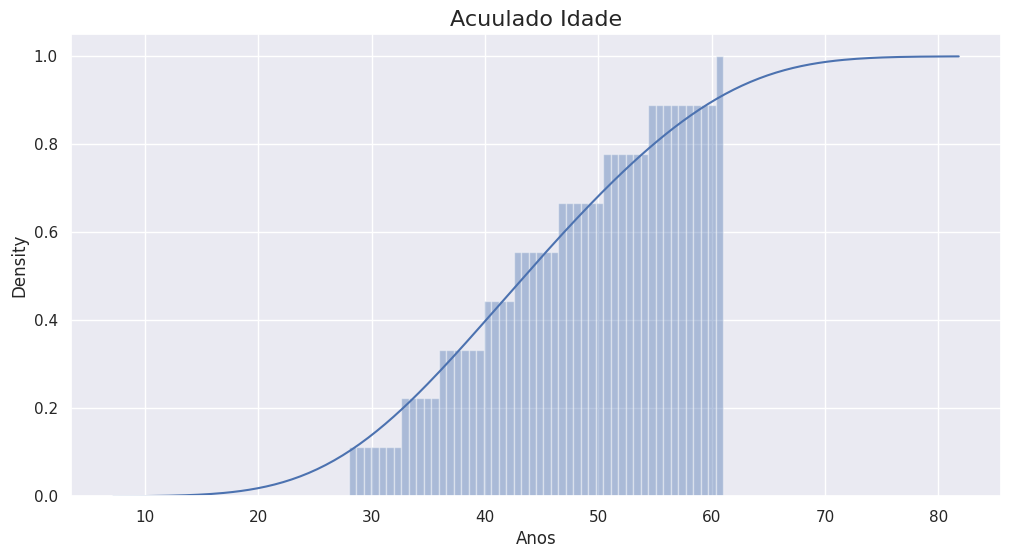

In [108]:
# Criando o Gráfico Acumulativo para Idade
decis_idade = dados['Idade'].quantile([i / 10 for i in range(1,10)])

ax = sns.distplot(decis_idade, hist_kws={'cumulative':True}, kde_kws= {'cumulative':True}, bins = 50)
ax.figure.set_size_inches(12,6)
ax.set_title('Acuulado Idade', fontsize = 16)
ax.set_xlabel('Anos', fontsize = 12);

## **Box Plot**

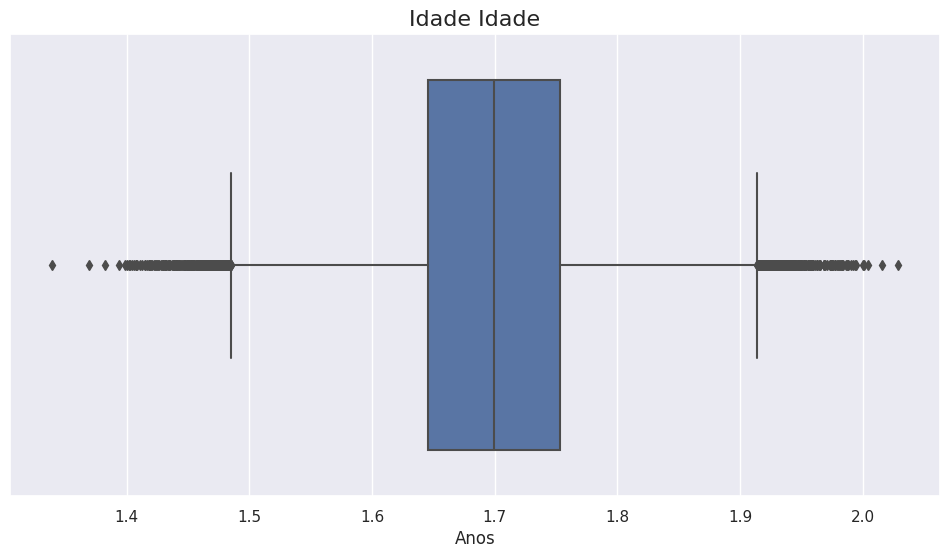

In [110]:
ax = sns.boxplot(x= 'Altura', data = dados, orient= 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Idade Idade', fontsize = 16)
ax.set_xlabel('Anos', fontsize = 12);

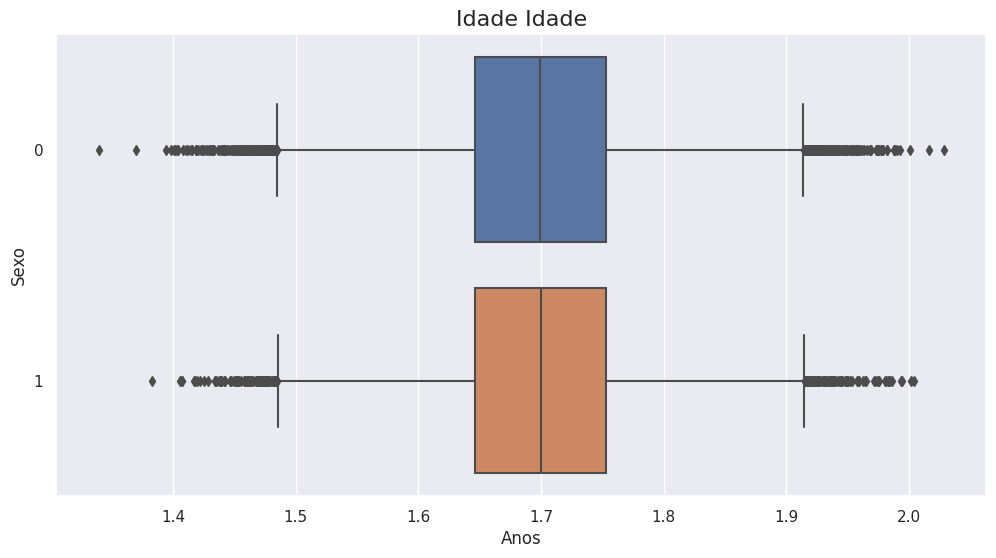

In [116]:
ax = sns.boxplot(x= 'Altura', y= 'Sexo', data = dados, orient= 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Idade Idade', fontsize = 16)
ax.set_xlabel('Anos', fontsize = 12);

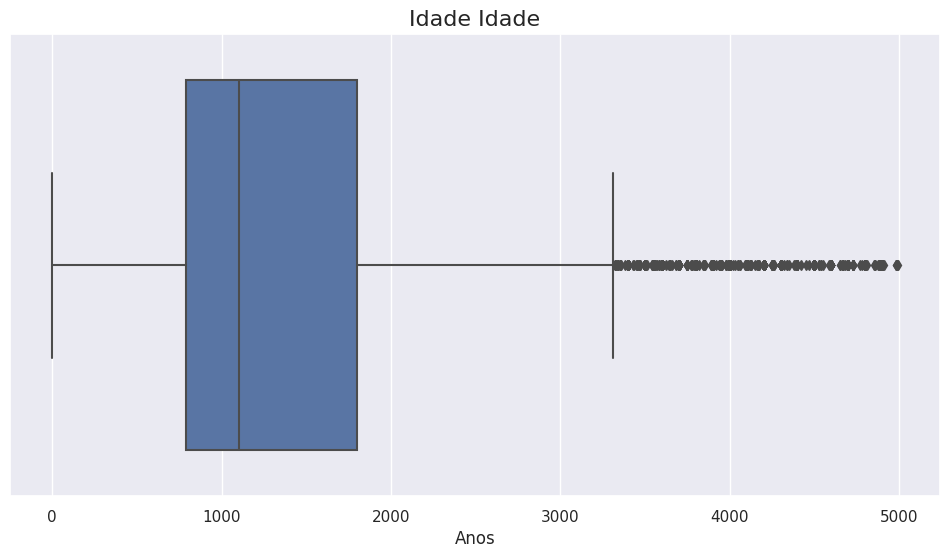

In [119]:
# Fazendo Filtro para gerar o gráfico
ax = sns.boxplot(x= 'Renda', data = dados.query("Renda < 5000"), orient= 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Idade Idade', fontsize = 16)
ax.set_xlabel('Anos', fontsize = 12);

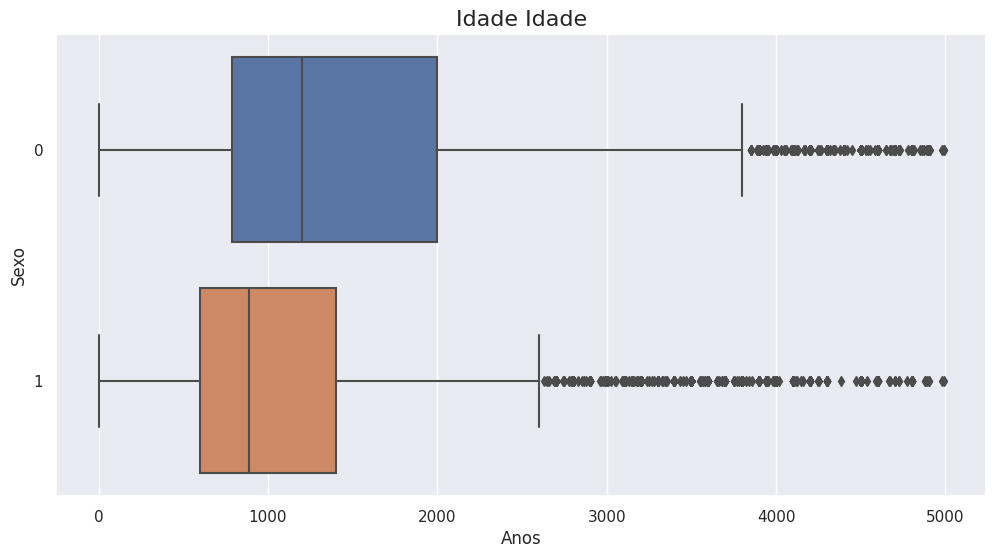

In [120]:
# Fazendo Filtro para gerar o gráfico
ax = sns.boxplot(x= 'Renda', y= 'Sexo', data = dados.query("Renda < 5000"), orient= 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Idade Idade', fontsize = 16)
ax.set_xlabel('Anos', fontsize = 12);

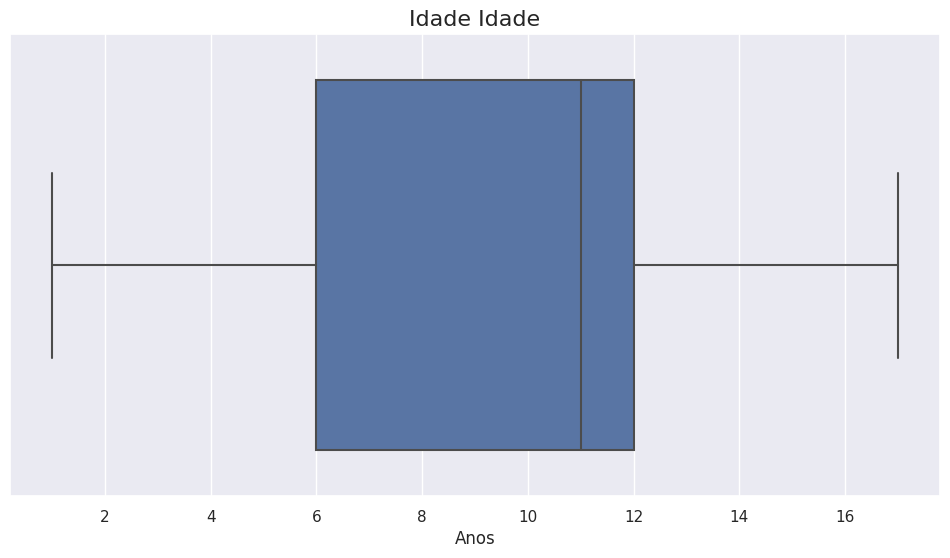

In [122]:
# Fazendo Filtro para gerar o gráfico
ax = sns.boxplot(x= 'Anos de Estudo', data= dados, orient= 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Idade Idade', fontsize = 16)
ax.set_xlabel('Anos', fontsize = 12);

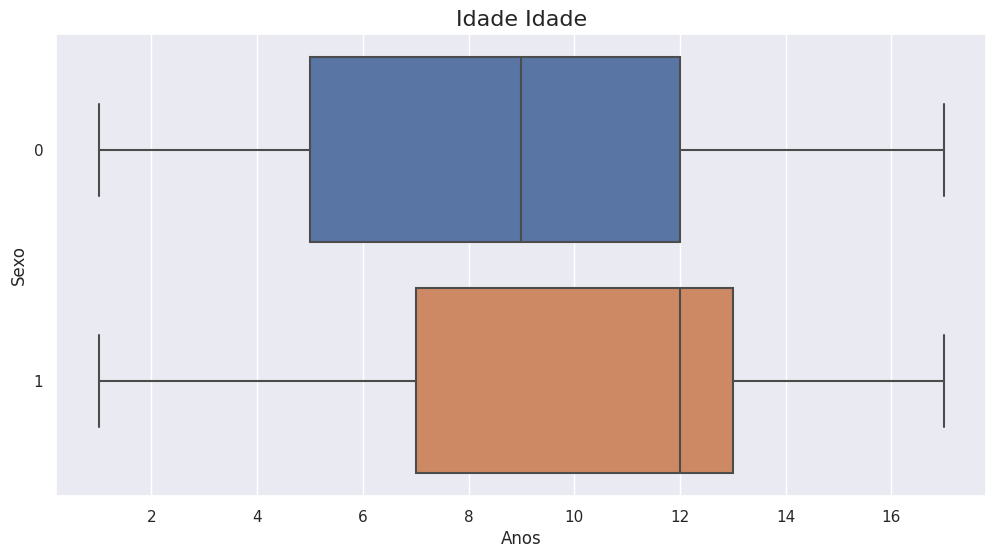

In [123]:
# Fazendo Filtro para gerar o gráfico
ax = sns.boxplot(x= 'Anos de Estudo', y= 'Sexo', data= dados, orient= 'h')
ax.figure.set_size_inches(12,6)
ax.set_title('Idade Idade', fontsize = 16)
ax.set_xlabel('Anos', fontsize = 12);

## **Medidas de Dispersão**

### Desvio Médio Absoluto

In [124]:
# Método está sendo descontinuado e será substituido pelo método abaixo
dados['Altura'].mad()

/tmp/ipykernel_1379307/2309474231.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dados['Altura'].mad()


0.0636007285748316

In [132]:
# Forma correta de calcular o desvio médio
(dados['Altura'] - dados['Altura'].mean()).abs().mean()

0.0636007285748316

### Variancia

In [133]:
dados['Altura'].var()

0.006354868656686795

### Desvio Padrão

In [134]:
dados['Altura'].std()

0.07971743006825292